#**HR_Analytics**

* **Analytics** means to analyse or to get insights from data.
* **Prediction** means inferences/inferential.

**Problem Statement:**

People Charm', a growing company is facing a high attrition rate (leaving the company) among their employees which in turn affects their business due to lack of expertise and experience.

* Their HR department is assigned the task to reduce the attrition rate by retaining the employees who are about to churn out.

* They need to recommend special plans or startegies which will help them to retain their employees which in turn will help them grow bigger as a company.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('people.csv')
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.isna().sum()    #or data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
#If there is null value in dataset

#1st way:

#drop that row
#data.dropna()

#2nd way:

#replace with mean, median, mode
# data['salary'] = data['salary'].replace(data['salary'].mean) --> Code.





**To check the duplicates values**

* **dataset.duplicated()** --> Find the duplicate value from entire dataset.

* **dataset.duplicated(['column_name'])**

In [6]:

data.duplicated(['salary'])

0        False
1        False
2         True
3         True
4         True
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [7]:
data[data.duplicated(['salary'])]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [8]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
data['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

**Important Note**

It seems like you want to replace the string 'dept' in the 'dept' column with 'department'. However, the **replace()** function is typically used to replace specific values, not column names. If you want to rename a column, you should use the **rename()** function instead. Here's how you can do it.

* **replace()**
* **data = data.rename(columns = {'salary': 'salary (in range)'})** --> *Syntax*

* **rename()**
* **data['dept'] = data['dept'].replace('dept', 'department')** --> *Syntax*

                              '

In [10]:
data = data.rename(columns = {'salary': 'salary (in range)',
                              'dept': 'department'})
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,department,salary (in range)
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [11]:
data.shape

(14999, 10)

In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(11991, 10)

In [14]:
#Statistical summary of data
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#Correlation between columns
data.drop('department', axis = 1, inplace = True)
data.drop('salary (in range)', axis = 1, inplace =True)



In [16]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.37,0.52,2,159,3,0,1,0
4,0.41,0.50,2,153,3,0,1,0


In [17]:
corr = data.corr()
corr

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

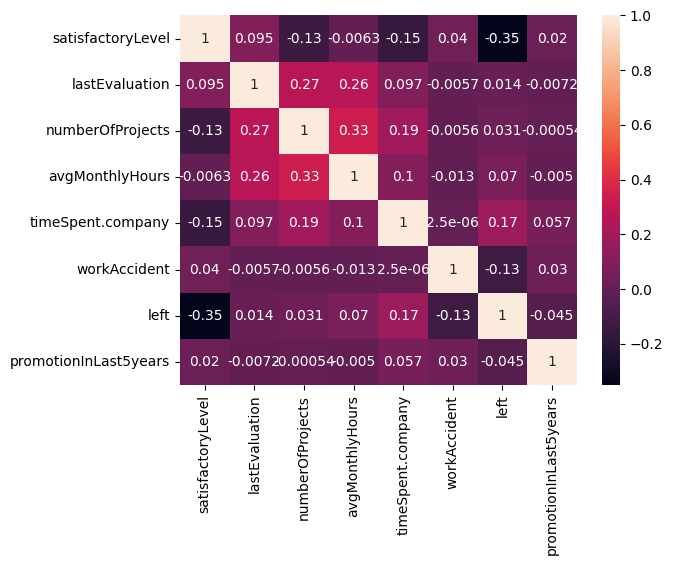

In [18]:
sns.heatmap(corr, annot = True)

In [19]:
data = pd.read_csv('people.csv')

**Correlation values: -1 to 1**

* **Positive correlation:** Correlation move in same dirrection (x->increase, y-> increase), if (y->decrease, y->decrease)

* **Negative correlation:** Correlation move in opposite dirrection (x->increase, y-> decrease), if (y->decrease, y->increase)

* **No correlation:** Does not exist any correlation between x & y.

###**Analysis of Attrition Rate**

In [20]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [21]:
corr

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: xlabel='left', ylabel='count'>

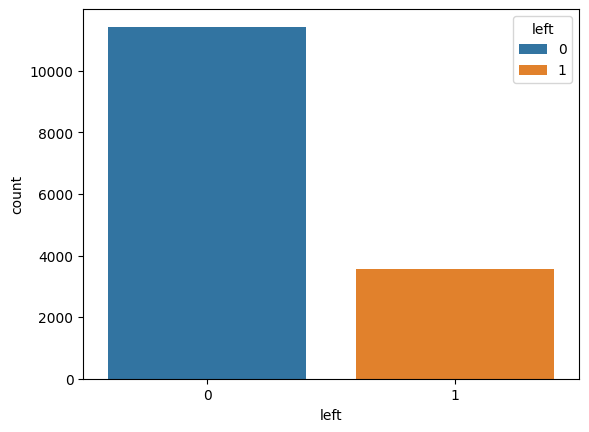

In [23]:
sns.countplot(x = 'left', data = data, hue = 'left') #false = 0, true = 1

In [24]:
data['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

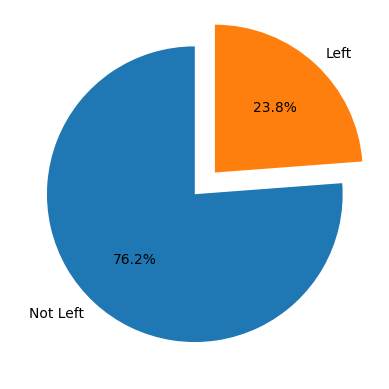

In [32]:
y = ['Not Left', 'Left']

plt.pie(data['left'].value_counts(), labels = y , autopct = '%.1f%%', explode = [0,0.2], startangle = 90)
plt.show()

#Attrition rate = 23.8%

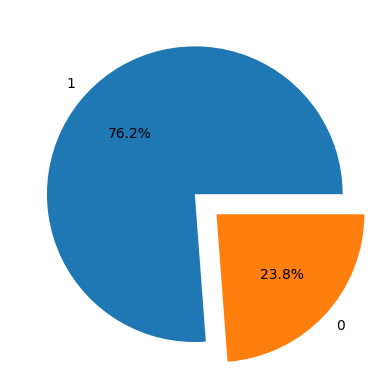

In [28]:
plt.pie(data['left'].value_counts(), labels = data['left'].unique(), autopct = '%.1f%%', explode = [0,0.2])
plt.show()

In [ ]:
# What is worklife balance of employees : No. of projects

<Axes: xlabel='numberOfProjects', ylabel='count'>

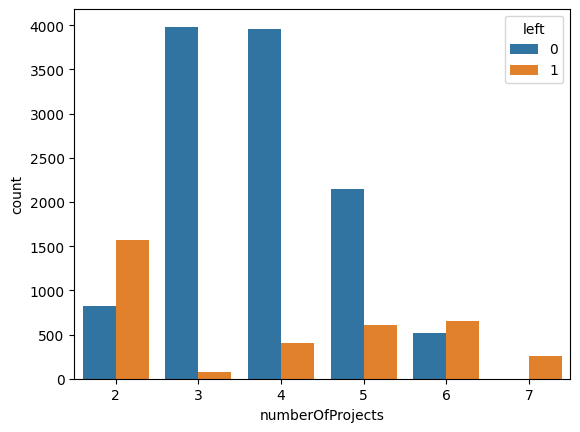

In [33]:
sns.countplot(x = 'numberOfProjects', data = data, hue = 'left')

In [40]:
#lets check attrition rate for employees with more projects and leaving the company

a = len(data[(data['numberOfProjects']>5) & (data['left']==1)])  #1 => means leave the company
percentage_attrition_rate_a = (a/14999) *100

print(percentage_attrition_rate_a, 'attrition rate for employees with more projects')

#lets check attrition rate for employees with less projects and leaving the company

b = len(data[(data['numberOfProjects']<3) & (data['left']==1)])
percentage_attrition_rate_b = (b/14999) *100

print(percentage_attrition_rate_b,'attrition rate for employees with less projects')

len(data) #total no. of rows.

6.073738249216615 attrition rate for employees with more projects
10.447363157543837 attrition rate for employees with less projects


14999

In [41]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


<Axes: xlabel='workAccident', ylabel='count'>

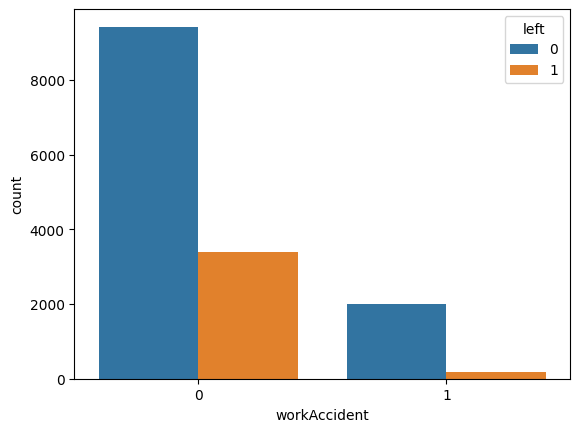

In [42]:
sns.countplot(x = 'workAccident', data = data, hue = 'left')

<Axes: xlabel='salary', ylabel='count'>

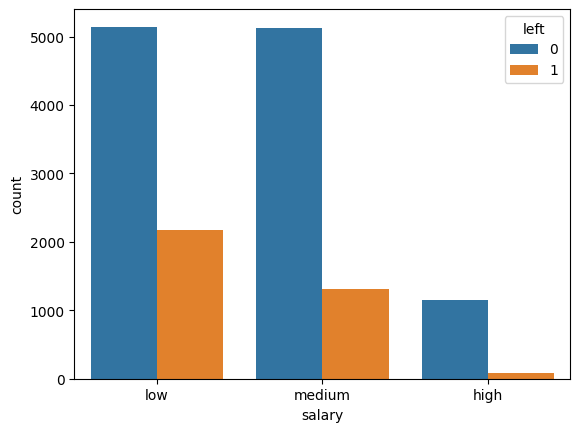

In [43]:
sns.countplot(x = 'salary', data = data, hue = 'left')

###**Boolean Value**

* **False: Equivalent to the integer value 0.**

* **True: Equivalent to the integer value 1.**

In [49]:
a = len(data[(data['promotionInLast5years']==0) & (data['left']==1)])
percentage_attrition_rate_a = (a/14999) *100

print(percentage_attrition_rate_a, 'attrition rate for employees with no promotion')

#lets check attrition rate for employees with less projects and leaving the company

b = len(data[(data['promotionInLast5years']==1) & (data['left']==0)])
percentage_attrition_rate_b = (b/14999) *100

print(percentage_attrition_rate_b,'attrition rate for employees with promotion')

len(data)


23.681578771918126 attrition rate for employees with no promotion
2.000133342222815 attrition rate for employees with promotion


14999

In [50]:
data['promotionInLast5years'].unique()

array([0, 1])

**Department wise check of Attrition rate**

In [53]:
data['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [54]:
data['dept'].value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'marketing'),
  Text(8, 0, 'management'),
  Text(9, 0, 'RandD')])

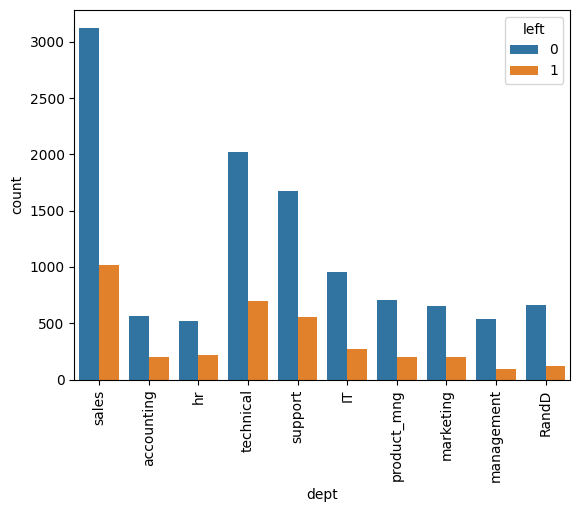

In [56]:
sns.countplot(x = 'dept', data = data, hue = 'left')
plt.xticks(rotation = 90)

In [63]:
#groupby --> Group two columns

data.groupby('dept').sum()['left'] #comparing two columns --> How many employees left the company


dept
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64